In [18]:
import numpy as np
import scipy.optimize
import random
from math import exp
from math import log

In [19]:
def inner(x,y):
    return sum([x[i]*y[i] for i in range(len(x))])
def sigmoid(x):
    return 1.0/(1+exp(-x))

In [20]:
#import data train_3 and train_5 into train
train = []
with open('hw5_train3.txt') as inputfile:
    for line in inputfile:
        train.append(line.strip().split(' '))
print(len(train))
with open('hw5_train5.txt') as inputfile:
    for line in inputfile:
        train.append(line.strip().split(' '))
train = [list(map(int,x)) for x in train] 
print(len(train))
y = [1]*700+[0]*700
#the first 700 are handwriting for "3"
#the last 700 are handwriting for "5"
#we use 1(positive) example to represents handwriting "3"
#use 0(negarive) example to represents handwriting "5"


700
1400


In [4]:
def loglikelihood(w):
    sum_likelihood = 0
    for i in range(len(train)):
        z=inner(w,train[i])
        sum_likelihood += y[i]*log(sigmoid(z))+(1-y[i])*log(1-sigmoid(z))
    return sum_likelihood

In [5]:
yita = 0.02/len(train)
def update_w(w):
    derivative = np.zeros(64) #derivative of L to w
    for i in range(len(train)):
        z=inner(w,train[i])
        coef = y[i]-sigmoid(z)
        x_i = np.array(train[i])
        derivative += x_i*coef
    w = w + yita*derivative
    return w


In [6]:
def error_rate(w):
    predict = []
    for i in range(len(train)):
        predict.append(inner(w,train[i]))
    judge = [1 if predict[i]>0 else 0 for i in range(len(train))]
    error = [(a!=b) for (a,b) in zip(judge,y)]
    error = sum(error)/len(train)*100#percentage error rate
    return error


In [7]:
w=np.zeros(64)
total_times = 10000 #run 10000 times
deriv_value=[]
error_value=[]
deriv_value.append(loglikelihood(w))
error_value.append(error_rate(w))
for j in range(1,total_times):
    w = update_w(w)
    deriv_value.append(loglikelihood(w))
    error_value.append(error_rate(w))
    



In [8]:
w1=[x for x in range(0,63,8)]
for i in w1:
    print('[',w[i],w[i+1],w[i+2],w[i+3],w[i+4],w[i+5],w[i+6],w[i+7],']')

[ 0.677176110296 0.837988208016 1.02897820256 0.858759026259 0.920163520683 0.0877989644628 -0.843836170376 -1.39076220877 ]
[ -0.16737709961 -0.189154431201 -0.23340269903 0.178262063564 -0.0798308862385 -0.384401624795 0.656451246636 0.484198500979 ]
[ -1.37149185068 -1.04840366919 -0.953427686647 -0.489106940123 -0.104375191115 1.30933008987 2.31012010485 1.95128890051 ]
[ -1.1592823966 -0.727734239566 -0.707899185586 0.236507809017 0.744897694378 0.484555014415 -0.0571002536073 0.190798656182 ]
[ -0.270963089095 -0.218822765155 -0.0332651117464 0.300957979726 0.339240148135 0.380101812828 0.230012996273 0.381375580432 ]
[ -0.678800255071 0.386024639265 -0.159903282624 -0.420027447177 -0.289586811682 0.156444922722 0.118716986102 0.959774875572 ]
[ -0.330075649406 -0.099220399782 -0.547629953998 -0.434140750533 -0.0424865678767 0.0695981502347 -0.302118920825 0.757544937218 ]
[ 0.125916110304 -0.35866248494 -0.499689056858 -0.938555366832 -0.357284974985 -0.477092513256 0.1818943862

In [9]:
w

array([ 0.67717611,  0.83798821,  1.0289782 ,  0.85875903,  0.92016352,
        0.08779896, -0.84383617, -1.39076221, -0.1673771 , -0.18915443,
       -0.2334027 ,  0.17826206, -0.07983089, -0.38440162,  0.65645125,
        0.4841985 , -1.37149185, -1.04840367, -0.95342769, -0.48910694,
       -0.10437519,  1.30933009,  2.3101201 ,  1.9512889 , -1.1592824 ,
       -0.72773424, -0.70789919,  0.23650781,  0.74489769,  0.48455501,
       -0.05710025,  0.19079866, -0.27096309, -0.21882277, -0.03326511,
        0.30095798,  0.33924015,  0.38010181,  0.230013  ,  0.38137558,
       -0.67880026,  0.38602464, -0.15990328, -0.42002745, -0.28958681,
        0.15644492,  0.11871699,  0.95977488, -0.33007565, -0.0992204 ,
       -0.54762995, -0.43414075, -0.04248657,  0.06959815, -0.30211892,
        0.75754494,  0.12591611, -0.35866248, -0.49968906, -0.93855537,
       -0.35728497, -0.47709251,  0.18189439,  0.22075026])

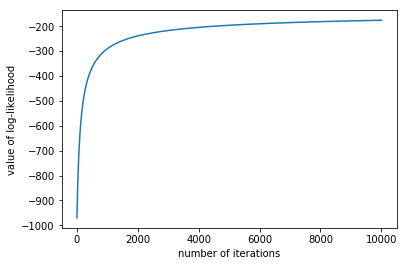

In [10]:
import matplotlib.pyplot as plt
x_label=[i for i in range(total_times)]
plt.plot(x_label,deriv_value)
plt.xlabel('number of iterations')
plt.ylabel('value of log-likelihood')
plt.show()


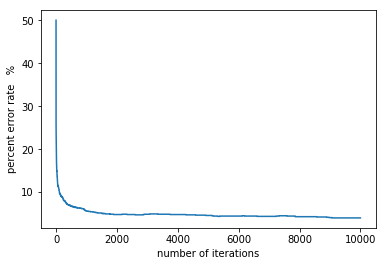

In [11]:
plt.plot(x_label,error_value)
plt.xlabel('number of iterations')
plt.ylabel('percent error rate   %')
plt.show()

        
        

In [23]:
#testing
#import data test_3 and test_5 into train
test = []
with open('hw5_test3.txt') as inputfile:
    for line in inputfile:
        test.append(line.strip().split(' '))
print(len(test))
with open('hw5_test5.txt') as inputfile:
    for line in inputfile:
        test.append(line.strip().split(' '))
test = [list(map(int,x)) for x in test] 
print(len(test))

400
800


In [24]:
y_test=[1]*400+[0]*400
predict_test = []
for i in range(len(test)):
    z=inner(w,test[i])
    if z>0:
        predict_test.append(1)
    else:
        predict_test.append(0)
error_test = [(a!=b) for (a,b) in zip(predict_test,y_test)]
error_test = sum(error_test)/len(test)*100#percentage error rate
print('error rate on test set is ',error_test,'%')

    
    

error rate on test set is  4.75 %


In [25]:
error_test1 = [(a!=b) for (a,b) in zip(predict_test,y_test)]
error_test1

[True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 Fals

In [16]:
len(test)

800